In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## load deconvolved data
deconv = sio.loadmat("../data/sample_deconv_traces.mat");
hd = sio.loadmat("../data/sample_stimulus.mat")['hd'];
Y_real = (deconv["s"]/deconv["sn"]).T; # normalize it by noise level (important!)

In [3]:
hd

array([[169.76519724, 169.76519724, 174.7376046 , ...,  30.25643716,
         30.96375653,  30.96375653]], shape=(1, 18325))

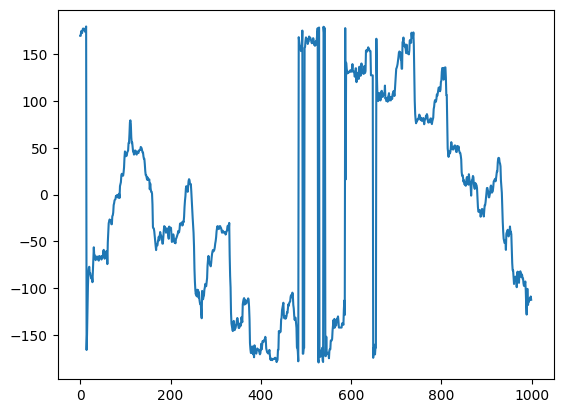

In [4]:
plt.plot(hd[0][:1000])

In [5]:
deconv

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Apr 10 13:36:23 2019',
 '__version__': '1.0',
 '__globals__': [],
 's': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  8.47876943, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , 21.44448371, ...,  0.90499196,
          2.41350635,  0.        ],
        [ 0.        ,  0.        ,  1.15267141, ...,  0.        ,
          0.        ,  1.65552125]], shape=(45, 18325)),
 'sn': array([[ 9.95573801],
        [ 3.92223042],
        [ 3.82585189],
        [10.69640249],
        [ 2.98575079],
        [11.01929219],
        [ 2.93761309],
        [19.89386201],
        [ 6.7672883 

In [6]:
np.nonzero(deconv["s"][0,:])

3323/18325

0.1813369713506139

In [7]:
from ZIGmodel import SngRlxEncoding
import torch

In [20]:
X=torch.tensor(hd, dtype=torch.float32).T
Y=torch.tensor(Y_real, dtype=torch.float32)
factor=torch.min(Y,axis=0).values
print(factor.shape)
model=SngRlxEncoding(yDim=45,xDim=1,gen_nodes=100,factor=factor)
print(X.shape)
print(Y.shape)

torch.Size([45])
torch.Size([18325, 1])
torch.Size([18325, 45])


In [10]:
Y

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 2.2162,  ..., 0.0000, 2.1022, 0.7434],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0887, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2366, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0677]])

In [24]:
import torch

# Assume model, X (hd), and Y (Y_real) are already defined as:
# model = SngRlxEncoding(yDim=45, xDim=1, gen_nodes=100, factor=torch.zeros(45) + 0.1)
# X = hd
# Y = Y_real

# Set your learning rate (make sure it matches your initialization)
learning_rate = 0.001  # adjust as needed

# Initialize the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Define the number of training epochs
num_epochs = 10000

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass: Compute entropy_loss and model outputs
    entropy_loss, theta, k, p, loc, rate = model(X, Y)
    
    # To replicate TensorFlow's maximize entropy_loss, minimize negative entropy_loss
    loss = -entropy_loss
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    # Print training progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# After training, you can switch to evaluation mode and use the model for inference:
model.eval()
with torch.no_grad():
    theta, k, p, loc, rate = model(X)


Epoch [100/10000], Loss: 526807.6875
Epoch [200/10000], Loss: 526315.7500
Epoch [300/10000], Loss: 525879.7500
Epoch [400/10000], Loss: 525488.2500
Epoch [500/10000], Loss: 525132.8750
Epoch [600/10000], Loss: 524810.7500
Epoch [700/10000], Loss: 524518.8750
Epoch [800/10000], Loss: 524254.5312
Epoch [900/10000], Loss: 524016.5312
Epoch [1000/10000], Loss: 523804.6250
Epoch [1100/10000], Loss: 523617.5000
Epoch [1200/10000], Loss: 523452.3125
Epoch [1300/10000], Loss: 523304.3750
Epoch [1400/10000], Loss: 523172.5000
Epoch [1500/10000], Loss: 523054.8750
Epoch [1600/10000], Loss: 523135.3125
Epoch [1700/10000], Loss: 522830.9375
Epoch [1800/10000], Loss: 523540.3125
Epoch [1900/10000], Loss: 522627.3750
Epoch [2000/10000], Loss: 522526.3750
Epoch [2100/10000], Loss: 522941.0312
Epoch [2200/10000], Loss: 522336.5938
Epoch [2300/10000], Loss: 522239.5938
Epoch [2400/10000], Loss: 522140.0625
Epoch [2500/10000], Loss: 522056.3750
Epoch [2600/10000], Loss: 521954.7812
Epoch [2700/10000], L

In [25]:
theta, k, p, loc, rate

(tensor([[1.6999, 0.9180, 1.1634,  ..., 0.5998, 1.2374, 0.6088],
         [1.6999, 0.9180, 1.1634,  ..., 0.5998, 1.2374, 0.6088],
         [1.7621, 0.9608, 1.1740,  ..., 0.5965, 1.2257, 0.6174],
         ...,
         [0.8198, 0.6969, 0.4906,  ..., 0.6201, 0.6886, 0.6668],
         [1.0074, 0.7061, 0.5240,  ..., 0.5998, 0.6691, 0.6653],
         [1.0074, 0.7061, 0.5240,  ..., 0.5998, 0.6691, 0.6653]]),
 tensor([0.7198, 0.9987, 0.9204, 0.7453, 0.8228, 0.8965, 1.0720, 1.0109, 0.9119,
         0.9351, 1.0856, 0.8613, 0.9778, 1.0892, 0.9112, 0.9665, 1.0785, 0.8733,
         0.9038, 0.7952, 0.9908, 1.1218, 0.8557, 0.8107, 0.8263, 0.8615, 1.0038,
         1.0591, 0.8612, 0.9017, 0.8724, 1.0183, 1.0532, 0.8683, 0.8589, 0.7689,
         1.0113, 0.9050, 1.0846, 0.9328, 0.9283, 0.8940, 1.0227, 0.8569, 1.0646]),
 tensor([[0.1485, 0.2270, 0.2799,  ..., 0.1635, 0.3119, 0.1663],
         [0.1485, 0.2270, 0.2799,  ..., 0.1635, 0.3119, 0.1663],
         [0.1497, 0.2466, 0.3008,  ..., 0.1634, 0.3287, 0

In [23]:
k

tensor([0.7042, 0.9647, 0.9060, 0.7254, 0.8002, 0.8874, 1.0542, 0.9950, 0.8818,
        0.9157, 1.0639, 0.8484, 0.9580, 1.0819, 0.8958, 0.9499, 1.0605, 0.8564,
        0.8922, 0.7682, 0.9771, 1.0987, 0.8328, 0.7952, 0.8100, 0.8337, 0.9751,
        1.0204, 0.8523, 0.8822, 0.8387, 0.9873, 1.0263, 0.8530, 0.8390, 0.7501,
        0.9955, 0.8568, 1.0727, 0.9156, 0.9079, 0.8837, 1.0046, 0.8368, 1.0353])

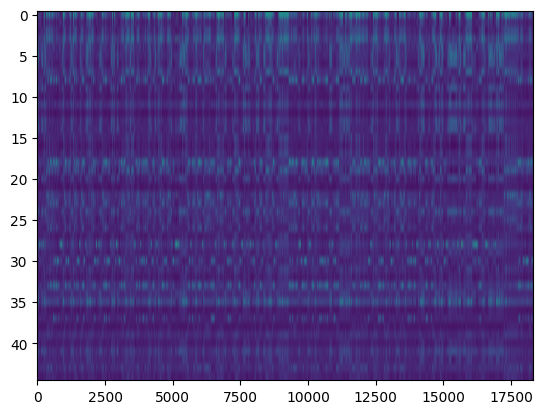

In [28]:
plt.imshow(theta.numpy().T, aspect='auto')

In [29]:
theta

tensor([[1.6999, 0.9180, 1.1634,  ..., 0.5998, 1.2374, 0.6088],
        [1.6999, 0.9180, 1.1634,  ..., 0.5998, 1.2374, 0.6088],
        [1.7621, 0.9608, 1.1740,  ..., 0.5965, 1.2257, 0.6174],
        ...,
        [0.8198, 0.6969, 0.4906,  ..., 0.6201, 0.6886, 0.6668],
        [1.0074, 0.7061, 0.5240,  ..., 0.5998, 0.6691, 0.6653],
        [1.0074, 0.7061, 0.5240,  ..., 0.5998, 0.6691, 0.6653]])

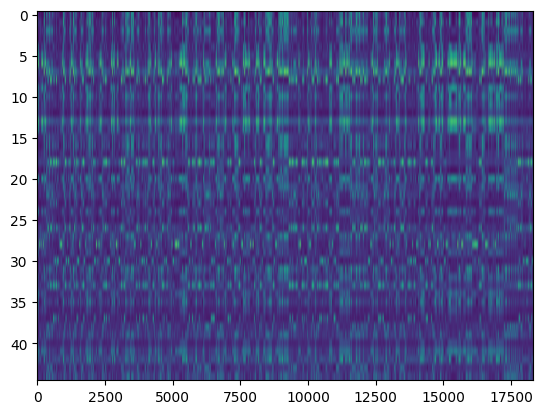

In [30]:
plt.imshow(p.numpy().T, aspect='auto')

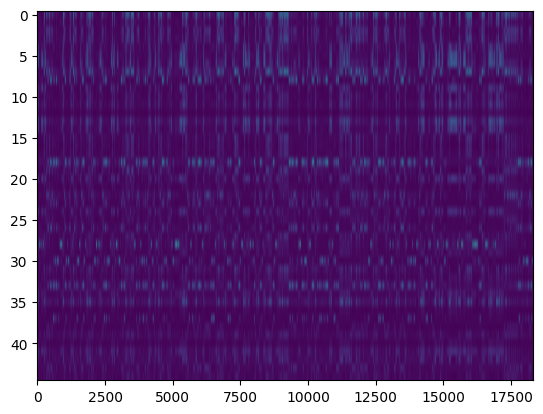

In [31]:
plt.imshow(p.numpy().T*theta.numpy().T, aspect='auto')

In [36]:
p

tensor([[0.1485, 0.2270, 0.2799,  ..., 0.1635, 0.3119, 0.1663],
        [0.1485, 0.2270, 0.2799,  ..., 0.1635, 0.3119, 0.1663],
        [0.1497, 0.2466, 0.3008,  ..., 0.1634, 0.3287, 0.1667],
        ...,
        [0.0405, 0.2661, 0.0784,  ..., 0.2324, 0.1884, 0.1678],
        [0.0423, 0.2668, 0.0796,  ..., 0.2260, 0.1821, 0.1699],
        [0.0423, 0.2668, 0.0796,  ..., 0.2260, 0.1821, 0.1699]])

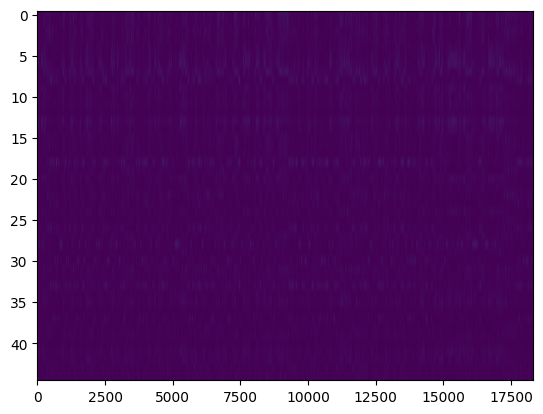

In [35]:
plt.imshow(Y_real.T,aspect='auto')

In [43]:
order = np.argsort(theta.T.max(axis=0));
prefer_dg = np.zeros(theta.T.shape[1]);
print(prefer_dg.shape)
for ii in range(theta.T.shape[1]):
    prefer_dg[ii] = np.where(theta.T[:,ii] == theta.T.max(axis=0)[ii])[0][0];
order = np.argsort(prefer_dg)

(18325,)


RuntimeError: The size of tensor a (45) must match the size of tensor b (18325) at non-singleton dimension 0